<a href="https://colab.research.google.com/github/FayAljumah/Ant-Colony-Optimization-on-TaSch/blob/main/OM_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACO**

# Simple Fixed Example

In [ ]:
import numpy as np
import random
import time
import pandas as pd

class AntColonyOptimization:
    def __init__(self, num_tasks, num_vms, exec_times, num_ants=10, iterations=100, alpha=1, beta=2, evaporation=0.5):
        self.num_tasks = num_tasks
        self.num_vms = num_vms
        self.exec_times = exec_times
        self.num_ants = num_ants
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.pheromone = np.ones((num_tasks, num_vms))
        self.best_solution = None
        self.best_makespan = float('inf')

    def probability(self, task, vm):
        pheromone = self.pheromone[task, vm] ** self.alpha
        heuristic = (1 / self.exec_times[task, vm]) ** self.beta
        return pheromone * heuristic

    def assign_tasks(self):
        solutions = []
        for _ in range(self.num_ants):
            assignment = []
            for task in range(self.num_tasks):
                probabilities = [self.probability(task, vm) for vm in range(self.num_vms)]
                probabilities /= np.sum(probabilities)
                selected_vm = np.random.choice(self.num_vms, p=probabilities)
                assignment.append(selected_vm)
            solutions.append(assignment)
        return solutions

    def evaluate_solution(self, assignment):
        vm_times = np.zeros(self.num_vms)
        for task, vm in enumerate(assignment):
            vm_times[vm] += self.exec_times[task, vm]
        return max(vm_times)

    def update_pheromone(self, solutions, makespans):
        self.pheromone *= (1 - self.evaporation)
        for assignment, makespan in zip(solutions, makespans):
            contribution = 1.0 / makespan
            for task, vm in enumerate(assignment):
                self.pheromone[task, vm] += contribution

    def optimize(self):
        start_time = time.time()
        for _ in range(self.iterations):
            solutions = self.assign_tasks()
            makespans = [self.evaluate_solution(sol) for sol in solutions]
            best_idx = np.argmin(makespans)
            if makespans[best_idx] < self.best_makespan:
                self.best_makespan = makespans[best_idx]
                self.best_solution = solutions[best_idx]
            self.update_pheromone(solutions, makespans)
        end_time = time.time()
        execution_time = end_time - start_time
        return self.best_solution, self.best_makespan, execution_time

# Generate random execution times for tasks on VMs
def generate_random_data(num_tasks, num_vms, min_time=5, max_time=10):
    return np.random.randint(min_time, max_time + 1, size=(num_tasks, num_vms))

# Example usage
num_tasks = 10
num_vms = 5
exec_times = generate_random_data(num_tasks, num_vms)
aco = AntColonyOptimization(num_tasks, num_vms, exec_times)
best_solution, best_makespan, execution_time = aco.optimize()

# Create a DataFrame for displaying task execution times per machine
df = pd.DataFrame(exec_times, columns=[f"VM_{j+1}" for j in range(num_vms)], index=[f"Task_{i+1}" for i in range(num_tasks)])
print("Task Execution Times per VM:")
print(df)

print("Best Assignment:", best_solution)
print("Best Makespan:", best_makespan)
print("Execution Time:", execution_time, "seconds")

Task Execution Times per VM:
         VM_1  VM_2  VM_3  VM_4  VM_5
Task_1     10     8    10     8     7
Task_2      7     7     9     8     7
Task_3      8     5     6     9     7
Task_4      5    10     5     9     8
Task_5      9     6     9    10     6
Task_6     10     5     5     5    10
Task_7      5     9    10     7     7
Task_8      8     6     5     9     9
Task_9      6     9     8    10     7
Task_10     5     6     6     8     8
Best Assignment: [4, 0, 3, 2, 1, 2, 0, 4, 1, 2]
Best Makespan: 16.0
Execution Time: 0.5188305377960205 seconds


# Simple Random Example

In [ ]:
# Example usage
num_tasks = random.randint(10, 20)
num_vms = random.randint(5, 10)
exec_times = generate_random_data(num_tasks, num_vms)
aco = AntColonyOptimization(num_tasks, num_vms, exec_times)
best_solution, best_makespan, execution_time = aco.optimize()

print("num_tasks:", num_tasks)
print("num_vms:", num_vms)

# Create a DataFrame for displaying task execution times per machine
df = pd.DataFrame(exec_times, columns=[f"VM_{j+1}" for j in range(num_vms)], index=[f"Task_{i+1}" for i in range(num_tasks)])
print("Task Execution Times per VM:")
print(df)

print("Best Assignment:", best_solution)
print("Best Makespan:", best_makespan)
print("Execution Time:", execution_time, "seconds")

num_tasks: 11
num_vms: 6
Task Execution Times per VM:
         VM_1  VM_2  VM_3  VM_4  VM_5  VM_6
Task_1      6     6     7     6     7     5
Task_2      9     7     7    10    10     7
Task_3      5     5     6     5     9     8
Task_4      5    10     6     8     8     9
Task_5      7     6     5     9     7     9
Task_6      8     7     8     8     6     5
Task_7      5     6     7     9     6     9
Task_8      5     6     5     5     8    10
Task_9      9     6     8     6     7    10
Task_10     5     5    10    10     5    10
Task_11     9     6    10     7     6     6
Best Assignment: [5, 1, 3, 0, 2, 5, 0, 2, 3, 4, 4]
Best Makespan: 11.0
Execution Time: 0.7669034004211426 seconds


# Like Prime Paper

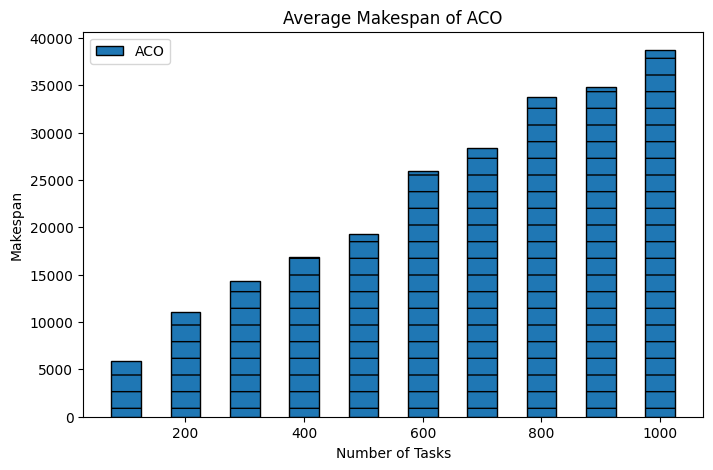

In [ ]:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

class AntColonyOptimization:
    def __init__(self, num_tasks, num_vms, exec_times, num_ants=10, iterations=100, alpha=1, beta=2, evaporation=0.5):
        self.num_tasks = num_tasks
        self.num_vms = num_vms
        self.exec_times = exec_times
        self.num_ants = num_ants
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.pheromone = np.ones((num_tasks, num_vms))
        self.best_solution = None
        self.best_makespan = float('inf')

    def probability(self, task, vm):
        pheromone = self.pheromone[task, vm] ** self.alpha
        heuristic = (1 / self.exec_times[task, vm]) ** self.beta
        return pheromone * heuristic

    def assign_tasks(self):
        solutions = []
        for _ in range(self.num_ants):
            assignment = []
            for task in range(self.num_tasks):
                probabilities = [self.probability(task, vm) for vm in range(self.num_vms)]
                probabilities /= np.sum(probabilities)
                selected_vm = np.random.choice(self.num_vms, p=probabilities)
                assignment.append(selected_vm)
            solutions.append(assignment)
        return solutions

    def evaluate_solution(self, assignment):
        vm_times = np.zeros(self.num_vms)
        for task, vm in enumerate(assignment):
            vm_times[vm] += self.exec_times[task, vm]
        return max(vm_times)

    def update_pheromone(self, solutions, makespans):
        self.pheromone *= (1 - self.evaporation)
        for assignment, makespan in zip(solutions, makespans):
            contribution = 1.0 / makespan
            for task, vm in enumerate(assignment):
                self.pheromone[task, vm] += contribution

    def optimize(self):
        start_time = time.time()
        for _ in range(self.iterations):
            solutions = self.assign_tasks()
            makespans = [self.evaluate_solution(sol) for sol in solutions]
            best_idx = np.argmin(makespans)
            if makespans[best_idx] < self.best_makespan:
                self.best_makespan = makespans[best_idx]
                self.best_solution = solutions[best_idx]
            self.update_pheromone(solutions, makespans)
        end_time = time.time()
        execution_time = end_time - start_time
        return self.best_solution, self.best_makespan, execution_time

# Generate random execution times for tasks on VMs
def generate_random_data(num_tasks, num_vms, min_time=1000, max_time=20000):
    return np.random.randint(min_time, max_time + 1, size=(num_tasks, num_vms))

# Run ACO for different task sizes
num_tasks_range = np.arange(100, 1100, 100)  # From 100 to 1000
num_vms = 50  # Fixed number of virtual machines
aco_makespan = []

for num_tasks in num_tasks_range:
    exec_times = generate_random_data(num_tasks, num_vms)
    aco = AntColonyOptimization(num_tasks, num_vms, exec_times)
    _, best_makespan, _ = aco.optimize()
    aco_makespan.append(best_makespan)

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(num_tasks_range, aco_makespan, width=50, label='ACO', hatch='-', edgecolor='black')

# Labels and Titles
ax.set_xlabel("Number of Tasks")
ax.set_ylabel("Makespan")
ax.set_title("Average Makespan of ACO")
ax.legend()

# Show the plot
plt.show()

# Change Hyperparameters

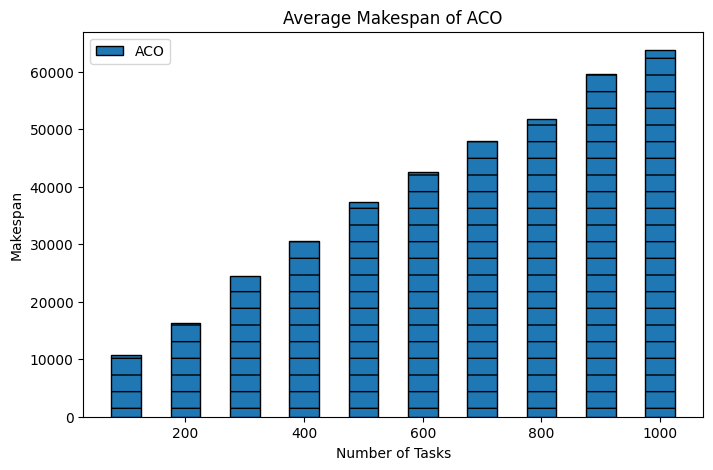

In [ ]:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

class AntColonyOptimization:
    def __init__(self, num_tasks, num_vms, exec_times, num_ants=10, iterations=100, alpha=0.3, beta=1, evaporation=0.4):
        self.num_tasks = num_tasks
        self.num_vms = num_vms
        self.exec_times = exec_times
        self.num_ants = num_ants
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.pheromone = np.ones((num_tasks, num_vms))
        self.best_solution = None
        self.best_makespan = float('inf')

    def probability(self, task, vm):
        pheromone = self.pheromone[task, vm] ** self.alpha
        heuristic = (1 / self.exec_times[task, vm]) ** self.beta
        return pheromone * heuristic

    def assign_tasks(self):
        solutions = []
        for _ in range(self.num_ants):
            assignment = []
            for task in range(self.num_tasks):
                probabilities = [self.probability(task, vm) for vm in range(self.num_vms)]
                probabilities /= np.sum(probabilities)
                selected_vm = np.random.choice(self.num_vms, p=probabilities)
                assignment.append(selected_vm)
            solutions.append(assignment)
        return solutions

    def evaluate_solution(self, assignment):
        vm_times = np.zeros(self.num_vms)
        for task, vm in enumerate(assignment):
            vm_times[vm] += self.exec_times[task, vm]
        return max(vm_times)

    def update_pheromone(self, solutions, makespans):
        self.pheromone *= (1 - self.evaporation)
        for assignment, makespan in zip(solutions, makespans):
            contribution = 1.0 / makespan
            for task, vm in enumerate(assignment):
                self.pheromone[task, vm] += contribution

    def optimize(self):
        start_time = time.time()
        for _ in range(self.iterations):
            solutions = self.assign_tasks()
            makespans = [self.evaluate_solution(sol) for sol in solutions]
            best_idx = np.argmin(makespans)
            if makespans[best_idx] < self.best_makespan:
                self.best_makespan = makespans[best_idx]
                self.best_solution = solutions[best_idx]
            self.update_pheromone(solutions, makespans)
        end_time = time.time()
        execution_time = end_time - start_time
        return self.best_solution, self.best_makespan, execution_time

# Generate random execution times for tasks on VMs
def generate_random_data(num_tasks, num_vms, min_time=1000, max_time=20000):
    return np.random.randint(min_time, max_time + 1, size=(num_tasks, num_vms))

# Run ACO for different task sizes
num_tasks_range = np.arange(100, 1100, 100)  # From 100 to 1000
num_vms = 50  # Fixed number of virtual machines
aco_makespan = []

for num_tasks in num_tasks_range:
    exec_times = generate_random_data(num_tasks, num_vms)
    aco = AntColonyOptimization(num_tasks, num_vms, exec_times)
    _, best_makespan, _ = aco.optimize()
    aco_makespan.append(best_makespan)

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(num_tasks_range, aco_makespan, width=50, label='ACO', hatch='-', edgecolor='black')

# Labels and Titles
ax.set_xlabel("Number of Tasks")
ax.set_ylabel("Makespan")
ax.set_title("Average Makespan of ACO")
ax.legend()

# Show the plot
plt.show()